In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.models import load_model

In [2]:
df=pd.read_csv('pimaindia.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


In [12]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [14]:
#Chapter 8 Data Visualization

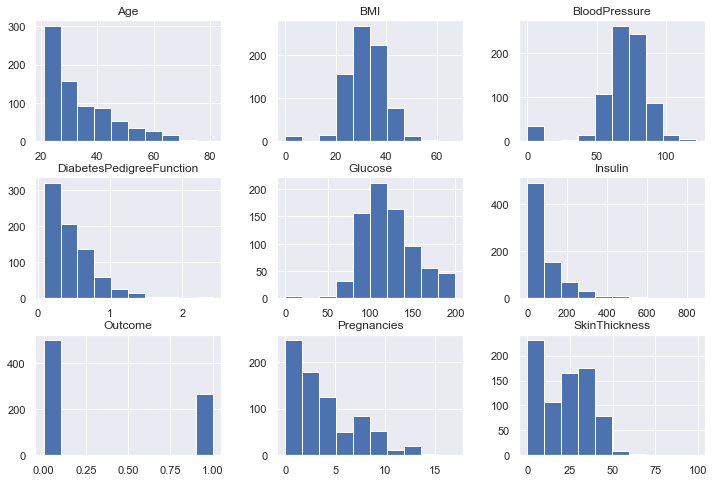

In [15]:
sns.set()
df.hist(figsize=(12,8))
plt.show()

<Figure size 864x576 with 0 Axes>

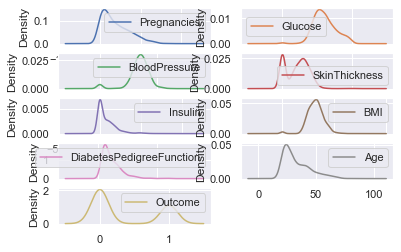

In [16]:

plt.figure(figsize=(12,8))
df.plot(kind='density',subplots=True,layout=(5,2),sharex=False)
plt.show()

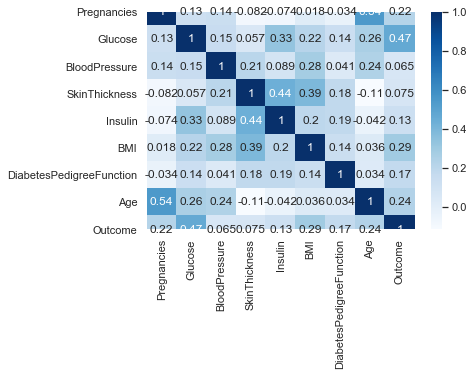

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

C:\Users\wallace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\wallace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


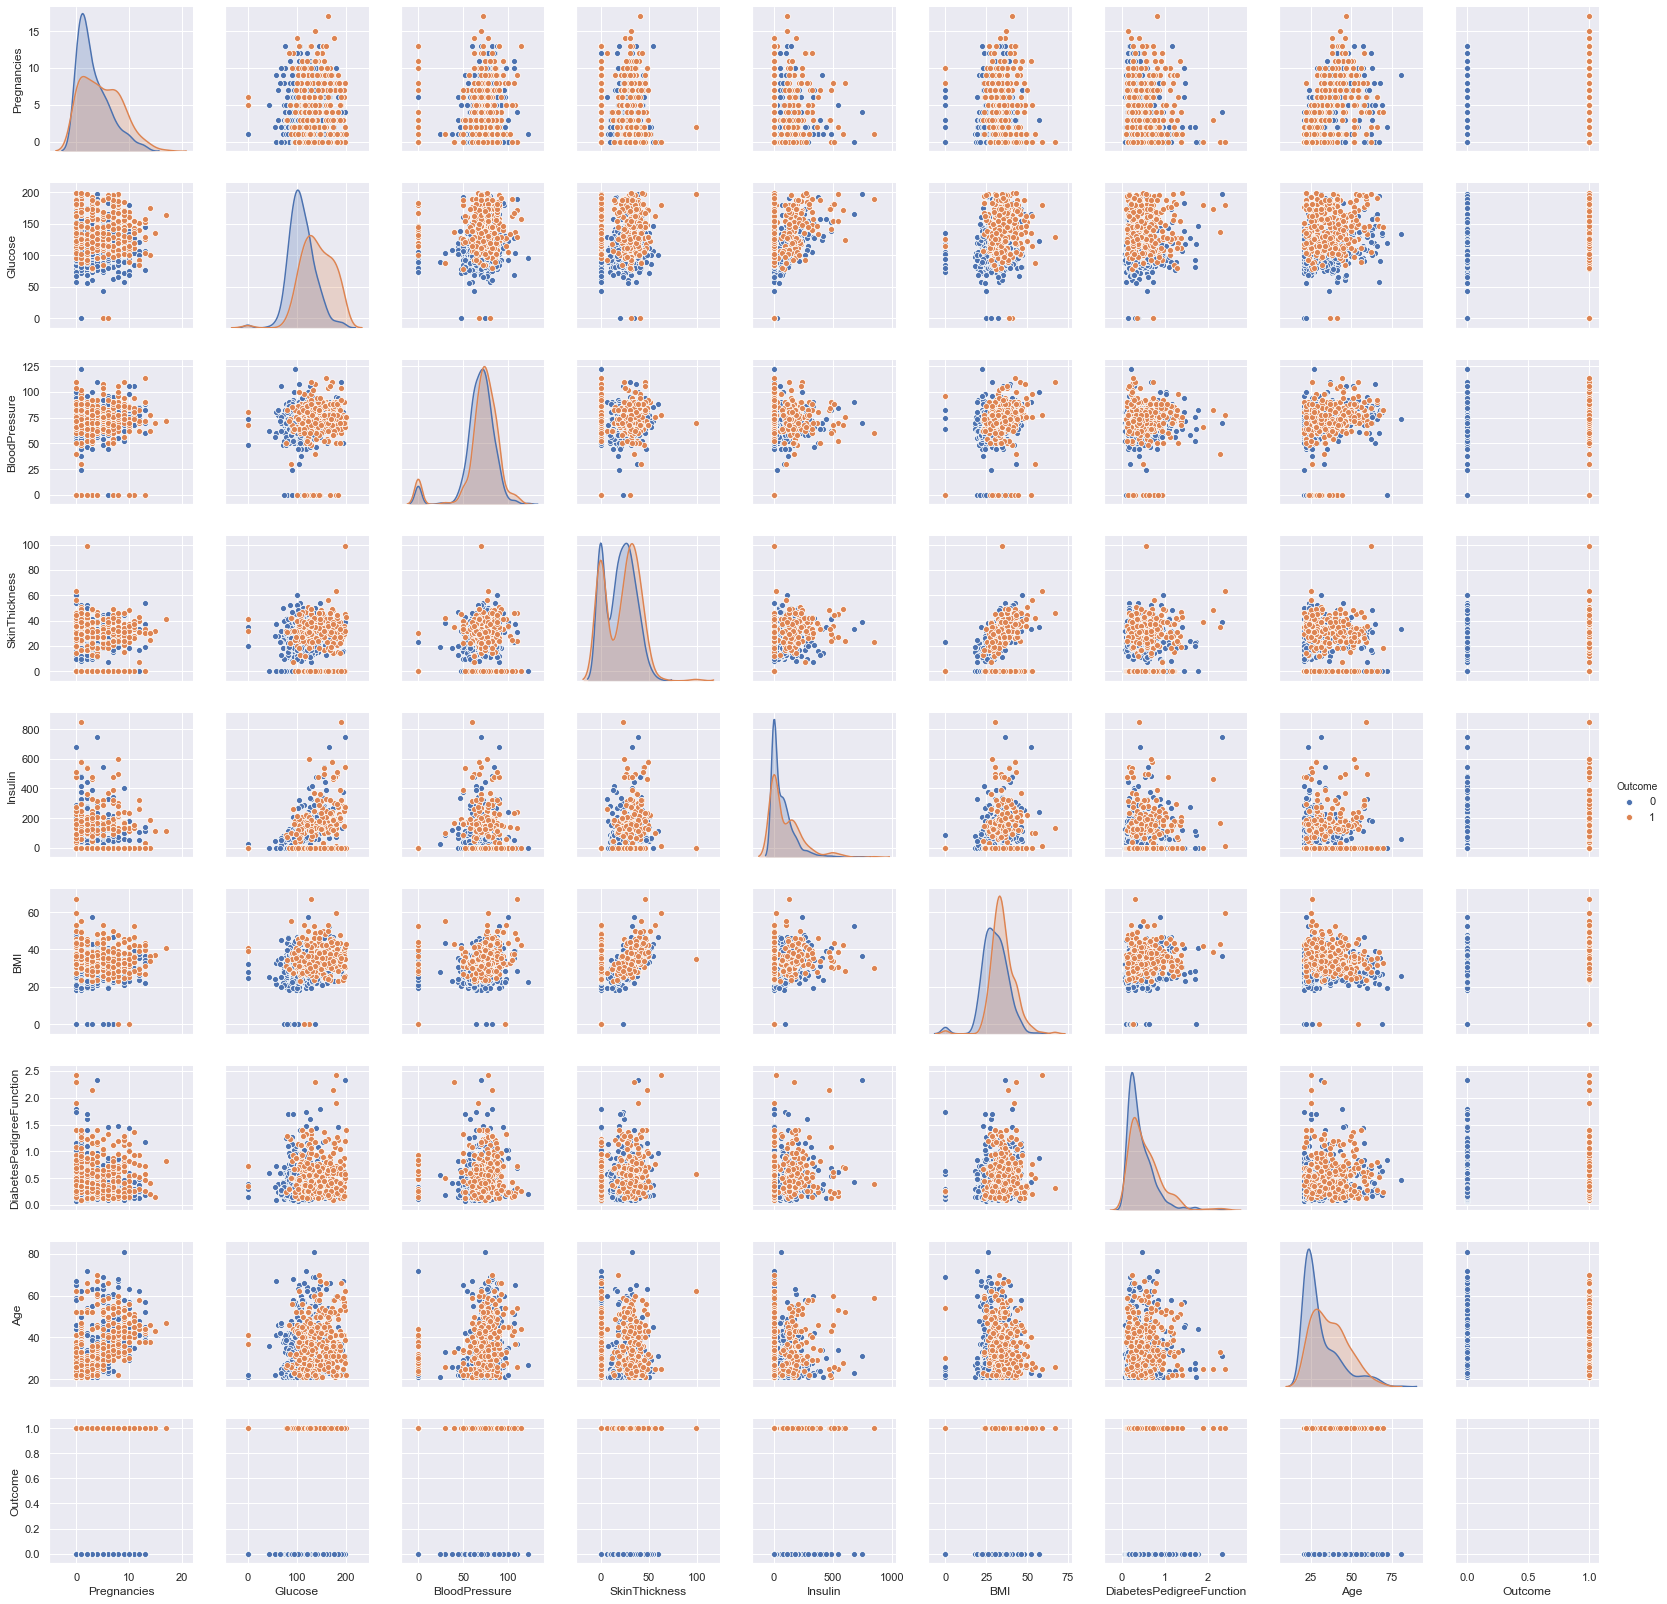

In [18]:
sns.pairplot(df,hue='Outcome')

In [22]:
#Model Building

In [23]:
y=df.Outcome
x=df.drop('Outcome',axis=1)

In [24]:
x.shape,y.shape

((768, 8), (768,))

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [27]:
# Artificial Neural Network  model

In [37]:
model=Sequential()
model.add(Dense(12,init='uniform',activation='relu',input_dim=xtrain.shape[1]))
model.add(Dense(8,init='uniform',activation='relu'))
model.add(Dense(1,init='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=10,epochs=200,verbose=1)
scores=model.evaluate(xtrain,ytrain,verbose=1)

C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", input_dim=8, kernel_initializer="uniform")`
  
C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Epoch 1/200
614/614 [==============================] - 3s 4ms/step - loss: 0.6884 - accuracy: 0.6547
Epoch 2/200
614/614 [==============================] - 0s 221us/step - loss: 0.6685 - accuracy: 0.6531
Epoch 3/200
614/614 [==============================] - 0s 214us/step - loss: 0.6171 - accuracy: 0.7182
Epoch 4/200
614/614 [==============================] - 0s 313us/step - loss: 0.5472 - accuracy: 0.7606
Epoch 5/200
614/614 [==============================] - 0s 217us/step - loss: 0.5020 - accuracy: 0.7638
Epoch 6/200
614/614 [==============================] - 0s 313us/step - loss: 0.4813 - accuracy: 0.7687
Epoch 7/200
614/614 [==============================] - 0s 404us/step - loss: 0.4717 - accuracy: 0.7752
Epoch 8/200
614/614 [==============================] - 0s 339us/step - loss: 0.4643 - accuracy: 0.7801
Epoch 9/200
614/614 [==============================] - 0s 267us/step - loss: 0.4612 - accuracy: 0.7769
Epoch 10/200
614/614 [==============================] - 0s 221us/step - los

614/614 [==============================] - 0s 223us/step - loss: 0.4237 - accuracy: 0.7915
Epoch 80/200
614/614 [==============================] - 0s 198us/step - loss: 0.4236 - accuracy: 0.7932
Epoch 81/200
614/614 [==============================] - 0s 193us/step - loss: 0.4225 - accuracy: 0.7932
Epoch 82/200
614/614 [==============================] - 0s 198us/step - loss: 0.4221 - accuracy: 0.7948
Epoch 83/200
614/614 [==============================] - 0s 254us/step - loss: 0.4225 - accuracy: 0.7980
Epoch 84/200
614/614 [==============================] - 0s 202us/step - loss: 0.4219 - accuracy: 0.7932
Epoch 85/200
614/614 [==============================] - 0s 207us/step - loss: 0.4216 - accuracy: 0.7964
Epoch 86/200
614/614 [==============================] - 0s 329us/step - loss: 0.4208 - accuracy: 0.7997
Epoch 87/200
614/614 [==============================] - 0s 314us/step - loss: 0.4229 - accuracy: 0.7964
Epoch 88/200
614/614 [==============================] - 0s 204us/step - loss:

Epoch 157/200
614/614 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.82 - 0s 211us/step - loss: 0.3958 - accuracy: 0.8192
Epoch 158/200
614/614 [==============================] - 0s 202us/step - loss: 0.3955 - accuracy: 0.8225
Epoch 159/200
614/614 [==============================] - 0s 210us/step - loss: 0.3955 - accuracy: 0.8241
Epoch 160/200
614/614 [==============================] - 0s 279us/step - loss: 0.3944 - accuracy: 0.8241
Epoch 161/200
614/614 [==============================] - 0s 263us/step - loss: 0.3953 - accuracy: 0.8192
Epoch 162/200
614/614 [==============================] - 0s 213us/step - loss: 0.3954 - accuracy: 0.8241
Epoch 163/200
614/614 [==============================] - 0s 306us/step - loss: 0.3942 - accuracy: 0.8290
Epoch 164/200
614/614 [==============================] - 0s 243us/step - loss: 0.3940 - accuracy: 0.8241
Epoch 165/200
614/614 [==============================] - 0s 199us/step - loss: 0.3930 - accuracy: 0.8225
Epoch 166/200

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.evaluate(xtrain,ytrain,verbose=True,batch_size=10)

614/614 [==============================] - 0s 111us/step


[0.3775023015197791, 0.8322475552558899]

In [63]:
#serialize model to JSON
# save model to json file
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
    
#serialize weights to HDF5
model.save_weights('model.h5')
print('Saved model to disk')


Saved model to disk


In [64]:
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights('model.h5')
print('Loaded model from disk')

Loaded model from disk


In [68]:
loaded_model.compile(loss='binary_crossentropy', optimizer= 'rmsprop' , metrics=['accuracy'])
score = loaded_model.evaluate(xtrain, ytrain, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

614/614 [==============================] - 2s 4ms/step
accuracy: 83.22%
